In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df = pd.read_csv("./bases/suicide/master.csv") 
df2 = pd.isnull(df['suicides'])
df[df2].reset_index(drop=True)
#dfsuicides = df.pivot_table('suicides', ['country'], 'year')
#dfsuicides.isnull()
#dfsuicides = dfsuicides.interpolate(method='linear',limit_direction='both', axis=1)
#dfsuicides = pd.melt(dfsuicides.reset_index(), id_vars=["country"], 
#                  var_name="year", value_name="suicides")


KeyError: 'suicides'

In [3]:
dfpopulation = df.pivot_table('population', ['country'], 'year')
dfpopulation = dfpopulation.interpolate(method='linear', limit_direction ='backward', axis=1)
dfpopulation = pd.melt(dfpopulation.reset_index(), id_vars=["country"], 
                  var_name="year", value_name="population")

In [20]:
dffinal = dfpopulation.merge(dfsuicides).sort_values(['country','year']).reset_index(drop=True)
dffinal['suicides100'] = (dffinal['suicides'] * 100000 ) / dffinal['population']
dffinal.to_csv("./bases/suicide/suicidios.csv")

In [5]:
unico = dffinal['country'].unique()

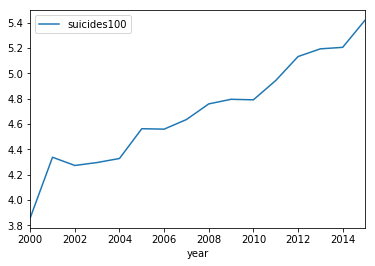

In [6]:
fig, ax = plt.subplots()
dffinal.where(dffinal.country=='Brazil').plot(x='year', y='suicides100', ax=ax)
#plt.plot(data=dfsuicide100, marker='o', markerfacecolor='olive', color='y', linewidth=2, markersize=4)

In [10]:
df2 = pd.read_csv("./bases/wdi/Indicators.csv")
dffinal = pd.read_csv("./bases/suicide/suicidios.csv")


In [11]:
filtro = df2.IndicatorCode.isin(['SP.DYN.LE00.IN','SP.DYN.LE00.FE.IN','SP.DYN.LE00.MA.IN','BX.TRF.PWKR.CD.DT','SP.POP.GROW','SP.DYN.CBRT.IN','NY.GNP.MKTP.CD', 'IC.TAX.PAYM','FP.CPI.TOTL','SL.EMP.MPYR.ZS','GC.XPN.TOTL.CN','SL.TLF.PRIM.ZS'])
filtro3 = df2.Year > 1999 
filtro4 = df2.Year < 2016
df2 = df2[filtro & filtro3 & filtro4]

In [12]:
df2.replace(["Slovak Republic", "Kyrgyz Republic","St. Lucia","Bahamas, The","Korea, Dem. Rep.","St. Vincent and the Grenadines","Russia"], ['Slovakia', 'Kyrgyzstan', 'Saint Lucia', 'Bahamas', 'Republic of Korea', 'Saint Vincent and Grenadines','Russian Federation'], inplace=True)                                 
filtro2 = df2.CountryName.isin(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Panama', 'Paraguay', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Saint Lucia', 'Saint Vincent and Grenadines', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Suriname', 'Sweden', 'Switzerland', 'Thailand', 'Trinidad and Tobago', 'Turkmenistan', 'Ukraine', 'United Kingdom', 'United States', 'Uruguay'])
df2 = df2[filtro2].reset_index(drop=True)
df2.rename(columns={'CountryName':'country','CountryCode':'countrycode'}, inplace=True)
df2

,country,countrycode,IndicatorName,IndicatorCode,Year,Value
0,Albania,ALB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2000,1.893800e+01
1,Albania,ALB,Consumer price index (2010 = 100),FP.CPI.TOTL,2000,7.415366e+01
2,Albania,ALB,GNI (current US$),NY.GNP.MKTP.CD,2000,3.738822e+09
3,Albania,ALB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2000,7.741900e+01
4,Albania,ALB,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,2000,7.127500e+01
5,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2000,7.427207e+01
6,Albania,ALB,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,2000,5.978000e+08
7,Albania,ALB,Population growth (annual %),SP.POP.GROW,2000,-6.373568e-01
8,Antigua and Barbuda,ATG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2000,2.024000e+01
9,Antigua and Barbuda,ATG,Consumer price index (2010 = 100),FP.CPI.TOTL,2000,8.108257e+01


In [14]:
dfpais = df2[['country','countrycode']].drop_duplicates().reset_index(drop=True)
df_inner = pd.merge(dfpais, dffinal, on='country', how='inner')
dfpais.to_csv("./bases/wdi/CountryAjustado.csv",index=False)

In [11]:
df3 = pd.read_excel("./bases/economic/Unemployment.xlsx")
df3.rename(columns={'Unnamed: 0':'Year'}, inplace=True)
df3 = pd.melt(df3.reset_index(), id_vars=["Year"],var_name="Country", value_name="unemployment")
filtro5 = df3.Year > 1999 
filtro6 = df3.Year < 2016
df3 = df3[filtro5 & filtro6]

In [12]:
df4 = pd.read_csv("./bases/education/EdStatsData.csv")

In [13]:
from pandas.api.types import is_number
df4 = pd.melt(df4, id_vars=["Country Code","Indicator Code"],var_name="Year", value_name="value")
df4 = df4[df4.Year.apply(lambda x: x.isnumeric())]
filtro7 = df4.Year > 1999 
filtro8 = df4.Year < 2016
df4 = df4[filtro7 & filtro8]

TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
df4